In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet50

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
num_classes = 10
batch_size = 128
learning_rate = 0.001
num_epochs = 20

In [6]:
# Data Augmentation and Normalization
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [7]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)


100%|██████████| 170M/170M [00:18<00:00, 9.16MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
model = resnet50(pretrained=True)

# Modify the final fully connected layer for CIFAR-10
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Move model to device
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 123MB/s]


In [10]:
from tqdm import tqdm

def train_model():
    model.train()
    for epoch in range(num_epochs):
        total_loss = 0
        correct = 0
        total = 0
        progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch [{epoch+1}/{num_epochs}]")
        for i, (images, labels) in progress_bar:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accuracy calculation
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

            # Update progress bar
            progress_bar.set_postfix(loss=loss.item(), accuracy=100 * correct / total)

        scheduler.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%')


In [11]:
def test_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
    print(f'Test Accuracy: {100 * correct / total:.2f}%')

if __name__ == '__main__':
    train_model()
    test_model()

Epoch [1/20]: 100%|██████████| 391/391 [00:47<00:00,  8.20it/s, accuracy=65.2, loss=0.706]


Epoch [1/20], Loss: 1.0156, Accuracy: 65.19%


Epoch [2/20]: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s, accuracy=74.6, loss=1.07]


Epoch [2/20], Loss: 0.7475, Accuracy: 74.56%


Epoch [3/20]: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s, accuracy=77.9, loss=0.685]


Epoch [3/20], Loss: 0.6561, Accuracy: 77.85%


Epoch [4/20]: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s, accuracy=77.9, loss=0.45]


Epoch [4/20], Loss: 0.6488, Accuracy: 77.94%


Epoch [5/20]: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s, accuracy=81.7, loss=0.48]


Epoch [5/20], Loss: 0.5381, Accuracy: 81.71%


Epoch [6/20]: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s, accuracy=82.9, loss=0.582]


Epoch [6/20], Loss: 0.4961, Accuracy: 82.85%


Epoch [7/20]: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s, accuracy=83.9, loss=0.551]


Epoch [7/20], Loss: 0.4681, Accuracy: 83.90%


Epoch [8/20]: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s, accuracy=84.8, loss=0.497]


Epoch [8/20], Loss: 0.4440, Accuracy: 84.75%


Epoch [9/20]: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s, accuracy=84.5, loss=0.241]


Epoch [9/20], Loss: 0.4546, Accuracy: 84.47%


Epoch [10/20]: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s, accuracy=85.8, loss=0.316]


Epoch [10/20], Loss: 0.4143, Accuracy: 85.77%


Epoch [11/20]: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s, accuracy=89.4, loss=0.254]


Epoch [11/20], Loss: 0.3096, Accuracy: 89.36%


Epoch [12/20]: 100%|██████████| 391/391 [00:45<00:00,  8.54it/s, accuracy=90.5, loss=0.281]


Epoch [12/20], Loss: 0.2741, Accuracy: 90.50%


Epoch [13/20]: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s, accuracy=90.9, loss=0.303]


Epoch [13/20], Loss: 0.2613, Accuracy: 90.88%


Epoch [14/20]: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s, accuracy=91.6, loss=0.279]


Epoch [14/20], Loss: 0.2443, Accuracy: 91.58%


Epoch [15/20]: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s, accuracy=91.7, loss=0.229]


Epoch [15/20], Loss: 0.2345, Accuracy: 91.74%


Epoch [16/20]: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s, accuracy=92.2, loss=0.247]


Epoch [16/20], Loss: 0.2266, Accuracy: 92.16%


Epoch [17/20]: 100%|██████████| 391/391 [00:47<00:00,  8.28it/s, accuracy=92.5, loss=0.219]


Epoch [17/20], Loss: 0.2173, Accuracy: 92.47%


Epoch [18/20]: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s, accuracy=92.6, loss=0.348]


Epoch [18/20], Loss: 0.2068, Accuracy: 92.62%


Epoch [19/20]: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s, accuracy=93, loss=0.439]


Epoch [19/20], Loss: 0.2034, Accuracy: 92.96%


Epoch [20/20]: 100%|██████████| 391/391 [00:45<00:00,  8.52it/s, accuracy=93.2, loss=0.257]


Epoch [20/20], Loss: 0.1929, Accuracy: 93.24%
Test Accuracy: 88.63%


In [16]:
import os

save_path = r'/content/sample_data/resnet50_cifar10.pth'
torch.save(model.state_dict(),save_path)

In [17]:
from PIL import Image
model = resnet50(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("/content/sample_data/resnet50_cifar10.pth"))
model = model.to(device)
model.eval()

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])



<ipython-input-17-5e282a3bbfe0>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/sample_data/resnet50_cifar10.pth"))


In [23]:
import matplotlib.pyplot as plt

def test_single_image(image_path):
    # Open and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image_resized = image.resize((32, 32))  # Resize to 32x32 as CIFAR-10 images are 32x32
    image_tensor = transform_test(image_resized).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Forward pass
    outputs = model(image_tensor)
    probabilities = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
    _, predicted = outputs.max(1)  # Get the class with the highest score

    # CIFAR-10 class labels
    class_labels = [
        'airplane', 'automobile', 'bird', 'cat', 'deer',
        'dog', 'frog', 'horse', 'ship', 'truck'
    ]
    predicted_class = class_labels[predicted.item()]
    predicted_probability = probabilities[0][predicted.item()].item()

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({predicted_probability:.2%})")
    plt.show()


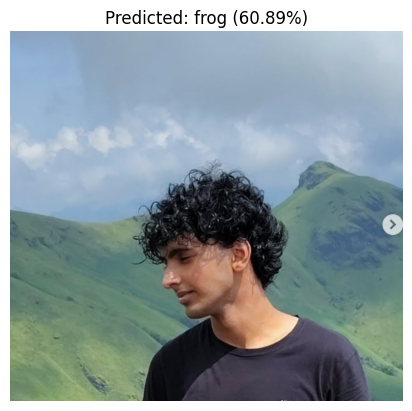

In [26]:
# Test with an example image
test_image_path = "/content/Screenshot 2025-01-21 232844.png"
test_single_image(test_image_path)